In [739]:
import pandas as pd 
import numpy as np 
import re
import seaborn as sns

In [676]:
data = pd.read_csv('sample_mkt_data_final.csv')
data

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,Unnamed: 0.1,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
0,0,0,Safari,NaN,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,6790377449422493910
1,1,1,Chrome,NaN,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,1431348163667504299
2,2,2,Chrome,NaN,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,5628749752915535966
3,3,3,Chrome,NaN,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7721996906492012430
4,4,4,Chrome,NaN,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,2699850580029059099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,71807,71807,YaBrowser,NaN,1,1499360023,1499360023,20170706,1,18,12.0,187.0,NaN,NaN,NaN,youtube.com,8636238363843235715
71808,71808,71808,Safari,NaN,1,1499409243,1499409243,20170706,1,22,15.0,382.0,NaN,NaN,NaN,m.youtube.com,2163624322857171652
71809,71809,71809,Chrome,NaN,2,1499357935,1499357935,20170706,1,23,22.0,916.0,NaN,NaN,NaN,youtube.com,7690948523840471251
71810,71810,71810,Chrome,NaN,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,NaN,NaN,NaN,youtube.com,3556380371648369739


In [677]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71812 entries, 0 to 71811
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Unnamed: 0          71812 non-null  int64  
 1   Unnamed: 0.1        71812 non-null  int64  
 2   browser             71812 non-null  object 
 3   visitorId           0 non-null      float64
 4   visitNumber         71812 non-null  int64  
 5   visitId             71812 non-null  int64  
 6   visitStartTime      71812 non-null  int64  
 7   date                71812 non-null  int64  
 8   visits              71812 non-null  int64  
 9   hits                71812 non-null  int64  
 10  pageviews           71796 non-null  float64
 11  timeOnSite          35284 non-null  float64
 12  bounces             36408 non-null  float64
 13  transactions        1031 non-null   float64
 14  transactionRevenue  1031 non-null   float64
 15  source              71812 non-null  object 
 16  full

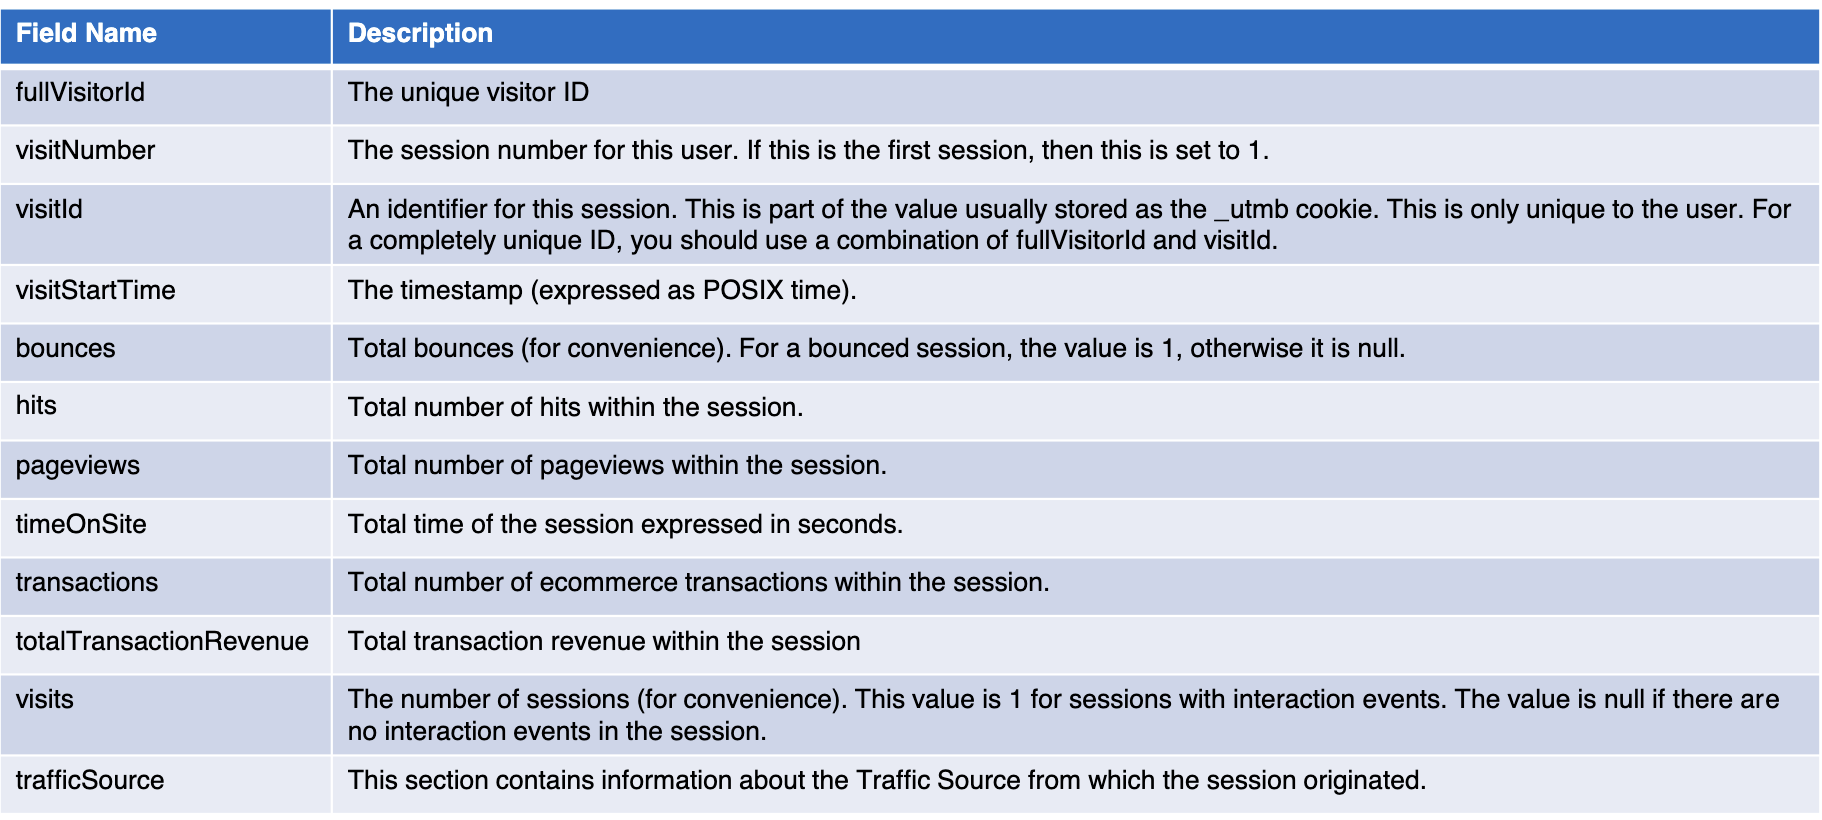

In [678]:
data = data.drop(data.columns[[0,1]],axis = 1)
data

,browser,visitorId,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
0,Safari,NaN,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,6790377449422493910
1,Chrome,NaN,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,1431348163667504299
2,Chrome,NaN,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,5628749752915535966
3,Chrome,NaN,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7721996906492012430
4,Chrome,NaN,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,2699850580029059099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,NaN,1,1499360023,1499360023,20170706,1,18,12.0,187.0,NaN,NaN,NaN,youtube.com,8636238363843235715
71808,Safari,NaN,1,1499409243,1499409243,20170706,1,22,15.0,382.0,NaN,NaN,NaN,m.youtube.com,2163624322857171652
71809,Chrome,NaN,2,1499357935,1499357935,20170706,1,23,22.0,916.0,NaN,NaN,NaN,youtube.com,7690948523840471251
71810,Chrome,NaN,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,NaN,NaN,NaN,youtube.com,3556380371648369739


In [764]:
len(data['date'].unique())

31

In [679]:
data.shape

(71812, 15)

In [680]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71812 entries, 0 to 71811
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   browser             71812 non-null  object 
 1   visitorId           0 non-null      float64
 2   visitNumber         71812 non-null  int64  
 3   visitId             71812 non-null  int64  
 4   visitStartTime      71812 non-null  int64  
 5   date                71812 non-null  int64  
 6   visits              71812 non-null  int64  
 7   hits                71812 non-null  int64  
 8   pageviews           71796 non-null  float64
 9   timeOnSite          35284 non-null  float64
 10  bounces             36408 non-null  float64
 11  transactions        1031 non-null   float64
 12  transactionRevenue  1031 non-null   float64
 13  source              71812 non-null  object 
 14  fullVisitorId       71812 non-null  object 
dtypes: float64(6), int64(6), object(3)
memory usage: 8.2+

In [681]:
data.duplicated().sum()

1

In [682]:
data = data.drop_duplicates()

In [683]:
data.nunique()

browser                  29
visitorId                 0
visitNumber             179
visitId               70478
visitStartTime        70578
date                     31
visits                    1
hits                    140
pageviews               104
timeOnSite             2377
bounces                   1
transactions              4
transactionRevenue      782
source                   97
fullVisitorId         61262
dtype: int64

In [684]:
def check_missed_values(df):
    df_null_percentage = df.isnull().sum() / df.shape[0] * 100
    df_null_percentage = df_null_percentage.drop(df_null_percentage[df_null_percentage == 0].index).sort_values(ascending= False).reset_index()
    df_null_percentage.columns = ["Feature", "Percentage"]
    return df_null_percentage

null_df = check_missed_values(data)
null_df

,Feature,Percentage
0,visitorId,100.000000
1,transactions,98.564287
2,transactionRevenue,98.564287
3,timeOnSite,50.865466
4,bounces,49.301639
5,pageviews,0.022281


In [685]:
data = data.drop(columns=['visitorId'])

In [686]:
data

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
0,Safari,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,6790377449422493910
1,Chrome,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,1431348163667504299
2,Chrome,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,5628749752915535966
3,Chrome,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,NaN,NaN,(direct),7721996906492012430
4,Chrome,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,NaN,NaN,google,2699850580029059099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,NaN,NaN,NaN,youtube.com,8636238363843235715
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,NaN,NaN,NaN,m.youtube.com,2163624322857171652
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,NaN,NaN,NaN,youtube.com,7690948523840471251
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,NaN,NaN,NaN,youtube.com,3556380371648369739


In [687]:
data.nunique()

browser                  29
visitNumber             179
visitId               70478
visitStartTime        70578
date                     31
visits                    1
hits                    140
pageviews               104
timeOnSite             2377
bounces                   1
transactions              4
transactionRevenue      782
source                   97
fullVisitorId         61262
dtype: int64

In [688]:
data['transactions'].fillna(0, inplace= True)
data['transactionRevenue'].fillna(0, inplace= True)
#sample['timeOnSite'].fillna(0, inplace= True)
data['bounces'].fillna(0, inplace= True)
data['pageviews'].fillna(0, inplace= True)

# KPI

In [689]:
data

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId
0,Safari,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,6790377449422493910
1,Chrome,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,1431348163667504299
2,Chrome,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,5628749752915535966
3,Chrome,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,0.0,0.0,(direct),7721996906492012430
4,Chrome,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,2699850580029059099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,0.0,youtube.com,8636238363843235715
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,0.0,m.youtube.com,2163624322857171652
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,0.0,youtube.com,7690948523840471251
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,0.0,youtube.com,3556380371648369739


#### visitID: ID cho cái session đấy 
#### visitNumber: số session của user đấy 
#### fullVisitorID: ID của cái visitor đấy

#### Mỗi dòng là 1 session

## Conversion Rate: 
### Total number of sessions in which visitors make at least one transaction / Total number of Sessions

In [690]:
num_ses_one_trans = data[data['transactions']>=1].shape[0]
# num_ses_one_trans = num_ses_one_trans['transactions'].sum()
num_ses_one_trans

1031

In [691]:
total_num_ses = data.shape[0]
total_num_ses

71811

In [692]:
convesion_rate = num_ses_one_trans/ total_num_ses
convesion_rate = convesion_rate * 100
convesion_rate

1.4357131915723218

## Bounce Rate 

### the percentage of sessions that are bounces

In [693]:
num_ses_bounces = data[data['bounces'] == 1].shape[0]
num_ses_bounces

36407

In [694]:
total_num_bounces = data.shape[0]
total_num_bounces

71811

In [695]:
bounce_rate =  num_ses_bounces / total_num_bounces *100
bounce_rate 

50.69836097533804

## Avg. session duration 

### The average time someone stayed on your site

In [696]:
avg_session_duration = data['timeOnSite'].mean() #in seconds
avg_session_duration

296.7820258474096

## 	Pages/session

### The average number of pages viewed per session

In [697]:
pages_per_sesion = data['pageviews'].mean()
pages_per_sesion

3.767570427928869

## Total Revenue

In [698]:
total_revenue = data['transactionRevenue'].sum()
total_revenue

124499280000.0

## Total sessions

In [699]:
total_sessions = data.shape[0]
total_sessions

71811

## Total transactions

In [700]:
total_transactions = data['transactions'].sum()
total_transactions

1072.0

## Total visitors

In [701]:
total_visitors = data["fullVisitorId"].nunique()
total_visitors

61262

## Avg. Transaction Value

In [702]:
np.mean(data["transactionRevenue"])

1733707.6492459374

## % new sessions

### The estimated percentage of first-time sessions.

In [703]:
percent_new_sessions = data["visitNumber"].value_counts(normalize=True)[1] * 100
percent_new_sessions

76.1443232930888

### % New versus returning visitors

In [704]:
freq_visitor = data["fullVisitorId"].value_counts()
freq_visitor

489038402765684003     35
232377434237234751     31
6172491755014940880    21
8726427406034606152    20
7477638593794484792    19
                       ..
2953234521357539709     1
6474797051223782997     1
2814610741491054168     1
9594658873331656258     1
7921939895544573895     1
Name: fullVisitorId, Length: 61262, dtype: int64

In [705]:
number_of_new_visitors = len(freq_visitor[freq_visitor == 1])
number_of_new_visitors

54545

In [706]:
number_of_returning_visitors = len(freq_visitor[freq_visitor != 1])
number_of_returning_visitors

6717

In [707]:
percent_new_vs_returning = number_of_new_visitors / number_of_returning_visitors
percent_new_vs_returning

8.120440672919457

## Some matrics calculated by month

In [708]:
data['date_converted'] = pd.to_datetime(data['visitStartTime'],unit='s', errors='coerce' )

In [709]:
data

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,date_converted
0,Safari,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,6790377449422493910,2017-07-13 12:32:24
1,Chrome,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,1431348163667504299,2017-07-13 12:26:02
2,Chrome,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,5628749752915535966,2017-07-13 10:09:38
3,Chrome,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,0.0,0.0,(direct),7721996906492012430,2017-07-14 02:41:36
4,Chrome,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,2699850580029059099,2017-07-13 18:19:18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,0.0,youtube.com,8636238363843235715,2017-07-06 16:53:43
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,0.0,m.youtube.com,2163624322857171652,2017-07-07 06:34:03
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,0.0,youtube.com,7690948523840471251,2017-07-06 16:18:55
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,0.0,youtube.com,3556380371648369739,2017-07-06 11:33:47


In [710]:
data['month'] = data['date_converted'].dt.month.astype('int')
data

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,date_converted,month
0,Safari,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,6790377449422493910,2017-07-13 12:32:24,7
1,Chrome,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,1431348163667504299,2017-07-13 12:26:02,7
2,Chrome,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,5628749752915535966,2017-07-13 10:09:38,7
3,Chrome,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,0.0,0.0,(direct),7721996906492012430,2017-07-14 02:41:36,7
4,Chrome,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,2699850580029059099,2017-07-13 18:19:18,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,0.0,youtube.com,8636238363843235715,2017-07-06 16:53:43,7
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,0.0,m.youtube.com,2163624322857171652,2017-07-07 06:34:03,7
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,0.0,youtube.com,7690948523840471251,2017-07-06 16:18:55,7
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,0.0,youtube.com,3556380371648369739,2017-07-06 11:33:47,7


In [711]:
# tháng 7 có 71142 quan sát
# tháng 8 có 669 quan sát 

### Total sessions: the total number of sessions in month 

### 	Total visitors: total number of visitors in month

### Total transactions:  total number of transactions in month

### Total revenue: total transaction revenue in month

# Chart 

In [712]:
# source_total_bounces = data.groupby('source')['bounces'].count().reset_index()
# source_total_bounces

In [713]:
# bounce_df = data[data['bounces'] == 1]
# bounce_df

In [714]:
# source_bounce = bounce_df.groupby('source')['bounces'].count().reset_index()
# source_bounce

In [715]:
# source_bounce_rate = pd.merge(source_total_bounces, source_bounce, on = 'source')
# source_bounce_rate

In [716]:
# source_bounce_rate['bounce_rate'] = source_bounce_rate['bounces_y'] / source_bounce_rate['bounces_x']
# source_bounce_rate = source_bounce_rate.drop(columns=['bounces_x', 'bounces_y'])
# source_bounce_rate

### Biểu đồ biến động về tổng số transaction và tổng số revenue theo ngày(dual axis)

In [743]:
revenue_day = data.groupby(data.date_converted.dt.day)['transactionRevenue'].sum()
revenue_day

date_converted
1     2.088200e+09
2     6.082900e+08
3     9.515100e+08
4     5.934800e+08
5     7.694400e+09
6     3.786020e+09
7     4.736200e+09
8     5.713800e+08
9     5.630500e+08
10    4.486800e+09
11    4.824030e+09
12    2.880050e+09
13    6.828650e+09
14    4.539440e+09
15    8.003300e+08
16    8.942300e+08
17    4.262610e+09
18    1.770067e+10
19    6.094020e+09
20    4.166750e+09
21    4.139140e+09
22    2.331040e+09
23    2.630750e+09
24    4.173340e+09
25    5.479990e+09
26    4.395930e+09
27    4.540940e+09
28    4.637720e+09
29    1.060650e+09
30    1.987650e+09
31    1.005202e+10
Name: transactionRevenue, dtype: float64

In [718]:
trans_day = data.groupby(data.date_converted.dt.day)['transactions'].sum().reset_index()
trans_day

,date_converted,transactions
0,1,15.0
1,2,7.0
2,3,11.0
3,4,11.0
4,5,34.0
5,6,35.0
6,7,39.0
7,8,18.0
8,9,17.0
9,10,46.0


In [719]:
total_rev_trans_day = pd.merge(trans_day, revenue_day,on = 'date_converted')
total_rev_trans_day

,date_converted,transactions,transactionRevenue
0,1,15.0,2.088200e+09
1,2,7.0,6.082900e+08
2,3,11.0,9.515100e+08
3,4,11.0,5.934800e+08
4,5,34.0,7.694400e+09
5,6,35.0,3.786020e+09
6,7,39.0,4.736200e+09
7,8,18.0,5.713800e+08
8,9,17.0,5.630500e+08
9,10,46.0,4.486800e+09


### Tổng số lượng truy cập theo các ngày trong tuần 

In [720]:
data['week_day'] = data['date_converted'].dt.dayofweek
data

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,date_converted,month,week_day
0,Safari,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,6790377449422493910,2017-07-13 12:32:24,7,3
1,Chrome,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,1431348163667504299,2017-07-13 12:26:02,7,3
2,Chrome,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,5628749752915535966,2017-07-13 10:09:38,7,3
3,Chrome,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,0.0,0.0,(direct),7721996906492012430,2017-07-14 02:41:36,7,4
4,Chrome,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,2699850580029059099,2017-07-13 18:19:18,7,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,0.0,youtube.com,8636238363843235715,2017-07-06 16:53:43,7,3
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,0.0,m.youtube.com,2163624322857171652,2017-07-07 06:34:03,7,4
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,0.0,youtube.com,7690948523840471251,2017-07-06 16:18:55,7,3
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,0.0,youtube.com,3556380371648369739,2017-07-06 11:33:47,7,3


In [721]:
data['week_day'] = data['week_day'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',5:'Saturday',6:'Sunaday'})

In [722]:
data

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,date_converted,month,week_day
0,Safari,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,6790377449422493910,2017-07-13 12:32:24,7,Thursday
1,Chrome,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,1431348163667504299,2017-07-13 12:26:02,7,Thursday
2,Chrome,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,5628749752915535966,2017-07-13 10:09:38,7,Thursday
3,Chrome,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,0.0,0.0,(direct),7721996906492012430,2017-07-14 02:41:36,7,Friday
4,Chrome,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,2699850580029059099,2017-07-13 18:19:18,7,Thursday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,0.0,youtube.com,8636238363843235715,2017-07-06 16:53:43,7,Thursday
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,0.0,m.youtube.com,2163624322857171652,2017-07-07 06:34:03,7,Friday
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,0.0,youtube.com,7690948523840471251,2017-07-06 16:18:55,7,Thursday
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,0.0,youtube.com,3556380371648369739,2017-07-06 11:33:47,7,Thursday


In [745]:
sessions_by_week = data.groupby('week_day')['visitId'].count().reset_index()
sessions_by_week

,week_day,visitId
0,Friday,10173
1,Monday,12209
2,Saturday,8812
3,Sunaday,8837
4,Thursday,10542
5,Tuesday,10601
6,Wednesday,10637


### Tổng số lượng truy cập theo các ngày trong tháng

In [724]:
data["day"] =data["date_converted"].dt.day

In [725]:
sessions_by_month = data.groupby('day')['visitId'].count().reset_index()
sessions_by_month

,day,visitId
0,1,2166
1,2,1955
2,3,1949
3,4,2005
4,5,2690
5,6,2738
6,7,2518
7,8,1964
8,9,1793
9,10,2632


In [748]:
sessions_by_month[sessions_by_month['visitId']==sessions_by_month['visitId'].max()]

,day,visitId
25,26,2833


In [749]:
sessions_by_month[sessions_by_month['visitId']==sessions_by_month['visitId'].min()]

,day,visitId
29,30,1627


In [737]:
data["hour"] =data["date_converted"].dt.hour 
sessions_by_hour = data.groupby("hour").count()["visitId"]
sessions_by_hour.reset_index()

,hour,visitId
0,0,2826
1,1,2721
2,2,2659
3,3,2555
4,4,2640
5,5,2510
6,6,2545
7,7,2587
8,8,2494
9,9,2227


# Theo từng source 

In [727]:
# sample["google"] = sample["source"].str.contains("google").astype("int")

In [728]:
# def classifier(row):
#     if row['source'].contains('google') == True:
#         return 'google'
# data['general_source'] = data.apply(classifier, axis=1)
# data

In [729]:
data['general_source'] = 'other'
data['general_source'][data['source'].str.contains('facebook')==True] = 'facebook'
data['general_source'][data['source'].str.contains('youtube')==True] = 'youtube'
data['general_source'][data['source'].str.contains('google')==True] = 'google'
data['general_source'][data['source'].str.contains('yahoo')==True] = 'yahoo'
data['general_source'][data['source'].str.contains('direct')==True] = 'direct'

<ipython-input-729-7576a301e410>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['general_source'][data['source'].str.contains('facebook')==True] = 'facebook'
<ipython-input-729-7576a301e410>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['general_source'][data['source'].str.contains('youtube')==True] = 'youtube'
<ipython-input-729-7576a301e410>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['general_source'][data['

In [730]:
# data['general_source'][data['source'].str.contains('facebook')==True] = 'facebook'

In [731]:
# data[data['general_source'] == 'facebook']

In [732]:
data

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,date_converted,month,week_day,day,hour,general_source
0,Safari,1,1499949144,1499949144,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,6790377449422493910,2017-07-13 12:32:24,7,Thursday,13,12,google
1,Chrome,1,1499948762,1499948762,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,1431348163667504299,2017-07-13 12:26:02,7,Thursday,13,12,google
2,Chrome,7,1499940578,1499940578,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,5628749752915535966,2017-07-13 10:09:38,7,Thursday,13,10,google
3,Chrome,1,1500000096,1500000096,20170713,1,1,1.0,NaN,1.0,0.0,0.0,(direct),7721996906492012430,2017-07-14 02:41:36,7,Friday,14,2,direct
4,Chrome,1,1499969958,1499969958,20170713,1,1,1.0,NaN,1.0,0.0,0.0,google,2699850580029059099,2017-07-13 18:19:18,7,Thursday,13,18,google
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,0.0,youtube.com,8636238363843235715,2017-07-06 16:53:43,7,Thursday,6,16,youtube
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,0.0,m.youtube.com,2163624322857171652,2017-07-07 06:34:03,7,Friday,7,6,youtube
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,0.0,youtube.com,7690948523840471251,2017-07-06 16:18:55,7,Thursday,6,16,youtube
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,0.0,youtube.com,3556380371648369739,2017-07-06 11:33:47,7,Thursday,6,11,youtube


### Biểu đồ thể hiện số lượng truy cập 

In [757]:
sessions_by_source = data.groupby("general_source").count()["visitId"]
sessions_by_source.reset_index()

,general_source,visitId
0,direct,19890
1,facebook,930
2,google,41333
3,other,3151
4,yahoo,122
5,youtube,6385


### Biểu đồ thể hiện conversion rate của từng source

In [758]:
conversion_rate_by_source = data[data["transactions"] >= 1].groupby("general_source").count()["transactions"] / sessions_by_source * 100
conversion_rate_by_source.reset_index()

,general_source,0
0,direct,3.283057
1,facebook,0.107527
2,google,0.875814
3,other,0.349096
4,yahoo,2.459016
5,youtube,0.015662


### Biểu đồ thể hiện bounce rate của từng source

In [759]:
bounce_rate_by_source = data.groupby("general_source").sum()["bounces"] / data.groupby("general_source").count()["bounces"] * 100
bounce_rate_by_source.reset_index()

,general_source,bounces
0,direct,43.262946
1,facebook,63.118280
2,google,51.542351
3,other,50.587115
4,yahoo,46.721311
5,youtube,66.718872


### Biểu đồ thể hiện số lượng transactions của từng source

In [760]:
transactions_by_source = data.groupby("general_source").sum()["transactions"]
transactions_by_source.reset_index()

,general_source,transactions
0,direct,684.0
1,facebook,1.0
2,google,371.0
3,other,12.0
4,yahoo,3.0
5,youtube,1.0


In [750]:
data['source'].unique()

array(['google', '(direct)', 'productforums.google.com', 'baidu', 'bing',
       'yahoo', 's0.2mdn.net', 'analytics.google.com', 'Partners',
       'sites.google.com', 'google.co.jp', 'google.com',
       'blog.golang.org', 'adwords.google.com', 'qiita.com', 'dfa',
       'docs.google.com', 'mail.google.com', 'm.sogou.com',
       'l.messenger.com', 'quora.com', 'youtube.com', 'facebook.com',
       'reddit.com', 'm.facebook.com', 'l.facebook.com',
       'groups.google.com', 'plus.url.google.com', 'outlook.live.com',
       'm.baidu.com', 'm.yz.sm.cn', 'es.search.yahoo.com',
       'duckduckgo.com', 'github.com', 'sashihara.jp', 'google.co.uk',
       'uk.search.yahoo.com', 'ask', 'lunametrics.com',
       'googleads.g.doubleclick.net', 'int.search.tb.ask.com',
       'dealspotr.com', 'lm.facebook.com', 'plus.google.com',
       'tw.search.yahoo.com', 'optimize.google.com',
       'search.mysearch.com', 'calendar.google.com',
       'images.google.com.au', 'support.google.com', 'm.you

In [751]:
# data['general_source'] = 'other'
# data['general_source'][data['source'].str.contains('facebook')==True] = 'facebook'
# data['general_source'][data['source'].str.contains('youtube')==True] = 'youtube'
# data['general_source'][data['source'].str.contains('google')==True] = 'google'
# data['general_source'][data['source'].str.contains('yahoo')==True] = 'yahoo'
# data['general_source'][data['source'].str.contains('direct')==True] = 'direct'

In [756]:
data[data['source'].str.contains('facebook') == True]

,browser,visitNumber,visitId,visitStartTime,date,visits,hits,pageviews,timeOnSite,bounces,transactions,transactionRevenue,source,fullVisitorId,date_converted,month,week_day,day,hour,general_source
2478,Chrome,1,1499996535,1499996535,20170713,1,1,1.0,NaN,1.0,0.0,0.0,youtube.com,729852777302840886,2017-07-14 01:42:15,7,Friday,14,1,youtube
2479,Android Webview,6,1499949060,1499949060,20170713,1,1,1.0,NaN,1.0,0.0,0.0,youtube.com,8810726670825349022,2017-07-13 12:31:00,7,Thursday,13,12,youtube
2483,Android Webview,7,1500012752,1500012752,20170713,1,1,1.0,NaN,1.0,0.0,0.0,youtube.com,8707494078692118223,2017-07-14 06:12:32,7,Friday,14,6,youtube
2485,Safari,1,1499988224,1499988224,20170713,1,1,1.0,NaN,1.0,0.0,0.0,youtube.com,3423497547055609712,2017-07-13 23:23:44,7,Thursday,13,23,youtube
2486,Chrome,1,1499963083,1499963083,20170713,1,1,1.0,NaN,1.0,0.0,0.0,youtube.com,3455117510163099679,2017-07-13 16:24:43,7,Thursday,13,16,youtube
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71807,YaBrowser,1,1499360023,1499360023,20170706,1,18,12.0,187.0,0.0,0.0,0.0,youtube.com,8636238363843235715,2017-07-06 16:53:43,7,Thursday,6,16,youtube
71808,Safari,1,1499409243,1499409243,20170706,1,22,15.0,382.0,0.0,0.0,0.0,m.youtube.com,2163624322857171652,2017-07-07 06:34:03,7,Friday,7,6,youtube
71809,Chrome,2,1499357935,1499357935,20170706,1,23,22.0,916.0,0.0,0.0,0.0,youtube.com,7690948523840471251,2017-07-06 16:18:55,7,Thursday,6,16,youtube
71810,Chrome,1,1499340827,1499340827,20170706,1,26,24.0,1598.0,0.0,0.0,0.0,youtube.com,3556380371648369739,2017-07-06 11:33:47,7,Thursday,6,11,youtube


youtube : 6385
facebook : 
google :
yahoo :
direct :
other :

In [753]:
count = 0 
for i in data['source'].unique():
    print(i)
#     if i.str.contains('facebook') == True:
#         count += 1
print(count)

google
(direct)
productforums.google.com
baidu
bing
yahoo
s0.2mdn.net
analytics.google.com
Partners
sites.google.com
google.co.jp
google.com
blog.golang.org
adwords.google.com
qiita.com
dfa
docs.google.com
mail.google.com
m.sogou.com
l.messenger.com
quora.com
youtube.com
facebook.com
reddit.com
m.facebook.com
l.facebook.com
groups.google.com
plus.url.google.com
outlook.live.com
m.baidu.com
m.yz.sm.cn
es.search.yahoo.com
duckduckgo.com
github.com
sashihara.jp
google.co.uk
uk.search.yahoo.com
ask
lunametrics.com
googleads.g.doubleclick.net
int.search.tb.ask.com
dealspotr.com
lm.facebook.com
plus.google.com
tw.search.yahoo.com
optimize.google.com
search.mysearch.com
calendar.google.com
images.google.com.au
support.google.com
m.youtube.com
siliconvalley.about.com
m.sp.sm.cn
online-metrics.com
google.co.in
au.search.yahoo.com
in.search.yahoo.com
it.pinterest.com
t.co
search.xfinity.com
aol
myactivity.google.com
google.ru
search.tb.ask.com
amp.reddit.com
earth.google.com
phandroid.com
google